# Introduction to DICOM Files - Images
This notebook is provided to give an overview of the DICOM file, and to visualise the pixel data.
As with the introduction worksheet, [pydicom](https://pydicom.github.io/) package is already installed in this environment, so this step is commented out.

In [1]:
# install pydicom

## Importing pydicom and loading test data
From pydicom, we import the dcmread and get_testdata_file functions, so we can work with some image data.

In [5]:
from pydicom import dcmread
from pydicom.data import get_testdata_file
path = get_testdata_file("CT_small.dcm")
ds = dcmread(path)

In [3]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

## Images
Lets first look at the Pixel data that is stored in the Pixel Data [7fe0,0010] element.

In [50]:
print('Variable type: ' + str(type(ds.PixelData)) + ' and length: ' + str(len(ds.PixelData)))

Variable type: <class 'bytes'> and length: 32768


To play around with pixel data, it helps to convert it to a [numpy](https://numpy.org/) array. The pydicom package automatically, when reading the DICOM file, creates an array that can be managed by numpy called the "pixel_array". Let's also import numpy so we can use some of its functions.

In [17]:
import numpy as np

First, lets see what the actual Pixel Data as stored in the DICOM files looks like. I'll pick the first 100 characters, so as to not waste space in the notebook:

In [6]:
str(ds.PixelData)[0:100]

"b'\\xaf\\x00\\xb4\\x00\\xa6\\x00\\x8f\\x00\\x8b\\x00\\x98\\x00\\xa7\\x00\\xbb\\x00\\xd4\\x00\\xec\\x00\\xe5\\x00\\xd5\\x00\\x"

Okay - looks weird but we already saw above that the PixelData is stored raw as bytes, and therefore doesn't mean too much to us. Instead, if we look at the pxiel_array:

In [13]:
ds.pixel_array

array([[175, 180, 166, ..., 203, 207, 216],
       [186, 183, 157, ..., 181, 190, 239],
       [184, 180, 171, ..., 152, 164, 235],
       ...,
       [906, 910, 923, ..., 922, 929, 927],
       [914, 954, 938, ..., 942, 925, 905],
       [959, 955, 916, ..., 911, 904, 909]], dtype=int16)

Much better, looks like numbers we recognise. Traditionally images are stored as 8 bit (can take values between 0 and 255 ($2^{8}-1$)), or 16 bit (between 0 and 65535 ($2^{16}$-1)). Here we can see the array we have is of type "int16" meaning the array contains integer values between 0 and 65535). Below we can check what the maximum and minimum values are.

In [23]:
print("The maximum value in our array is: " + str(np.max(ds.pixel_array)) + " and the minimum is: " + str(np.min(ds.pixel_array)))

The maximum value in our array is: 2191 and the minimum is: 128


And to check the array size, we use the shape function:

In [24]:
ds.pixel_array.shape

(128, 128)

## Viewing the Image
To actually view the image, we make use of one of the most commonly used python packages [matplotlib](https://matplotlib.org/). First we import the package, and the show the image.

In [8]:
import matplotlib.pyplot as plt

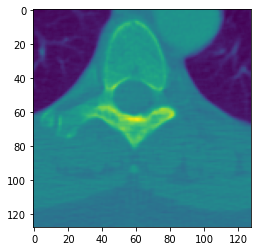

In [9]:
plt.imshow(arr)

The default colormap (colo***u***rmap) in matplotlib uses some funky colours. Let's change how it looks; first let's see the options:

In [61]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

Okay, "bone" sounds good, as does "Greys"

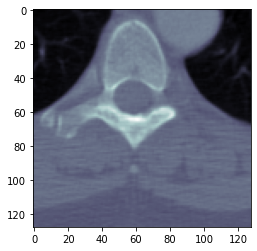

In [56]:
plt.imshow(arr,cmap="bone")

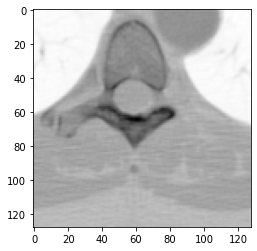

In [63]:
plt.imshow(arr,cmap="Greys")

Okay not quite with the Greys. Luckily matplotlib has reversed versions of all of its default colormaps - we just need to append "_r":

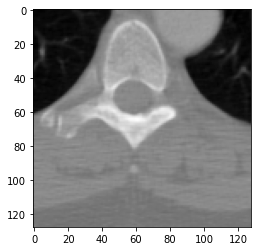

In [64]:
plt.imshow(arr,cmap="Greys_r")

Much better! We have now looked at how to load and present an image from a DICOM dataset!